In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#from sklearn.preprocessing import MinMaxScaler import numpy as np \
# Sample data data = np.array([[1], [2], [3], [4], [5]]) # Initialize the scaler scaler = MinMaxScaler() # Fit
# use inverse scaler in the end


In [401]:
bike_df = pd.read_csv(r'C:\Users\Manoj Kumar Panicker\python Again\Files\day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [402]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [403]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_rain'})
bike_df['season']= bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
print(bike_df['weathersit'].head()) 
print(bike_df['season'].head())

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object
0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object


In [404]:
# creating dummy variables
weather_cond = pd.get_dummies(bike_df['weathersit']).drop('Light_Snow_Rain',axis =1)
weather_cond.head()

,Clear,Mist
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False


In [405]:
bike_df = pd.concat([bike_df,weather_cond],axis=1)

In [406]:
bike_df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [407]:
season = pd.get_dummies(bike_df['season']).drop('winter',axis=1)
season.head()

,fall,spring,summer
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [408]:
bike_df = pd.concat([bike_df,season],axis=1)

In [409]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Clear,Mist,fall,spring,summer
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,...,80.5833,10.749882,331,654,985,False,True,False,True,False
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,...,69.6087,16.652113,131,670,801,False,True,False,True,False
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,...,43.7273,16.636703,120,1229,1349,True,False,False,True,False
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,...,59.0435,10.739832,108,1454,1562,True,False,False,True,False
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,...,43.6957,12.522300,82,1518,1600,True,False,False,True,False


In [410]:
bike_df=bike_df.drop(['weathersit','season'],axis=1)

In [411]:
train_df, test_df = train_test_split(bike_df,train_size =0.7,random_state=70)
print(train_df.shape)
print(test_df.shape)

(510, 19)
(220, 19)


In [412]:
bike_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Clear,Mist,fall,spring,summer
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,True,False,True,False
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,False,True,False,True,False
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,True,False,False,True,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,True,False,False,True,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,True,False,False,True,False


In [413]:
num_var= ['atemp','temp','hum','windspeed','cnt','registered','mnth','weekday']

In [414]:
scaler = MinMaxScaler()

In [415]:
train_df[num_var] = scaler.fit_transform(train_df[num_var])
train_df[num_var].head()

,atemp,temp,hum,windspeed,cnt,registered,mnth,weekday
692,0.233759,0.273137,0.416024,0.730778,0.259434,0.249062,0.909091,1.000000
127,0.606003,0.584649,0.649529,0.107707,0.495973,0.420445,0.363636,0.000000
133,0.580786,0.575304,0.948586,0.232045,0.389669,0.359082,0.363636,1.000000
524,0.784325,0.812053,0.449443,0.251294,0.860101,0.688709,0.454545,1.000000
209,0.973898,0.970925,0.557841,0.312833,0.439945,0.455674,0.545455,0.833333


In [416]:
train_df=train_df.drop(['instant','dteday','casual'],axis=1)

In [417]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 692 to 334
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   mnth        510 non-null    float64
 2   holiday     510 non-null    int64  
 3   weekday     510 non-null    float64
 4   workingday  510 non-null    int64  
 5   temp        510 non-null    float64
 6   atemp       510 non-null    float64
 7   hum         510 non-null    float64
 8   windspeed   510 non-null    float64
 9   registered  510 non-null    float64
 10  cnt         510 non-null    float64
 11  Clear       510 non-null    bool   
 12  Mist        510 non-null    bool   
 13  fall        510 non-null    bool   
 14  spring      510 non-null    bool   
 15  summer      510 non-null    bool   
dtypes: bool(5), float64(8), int64(3)
memory usage: 50.3 KB


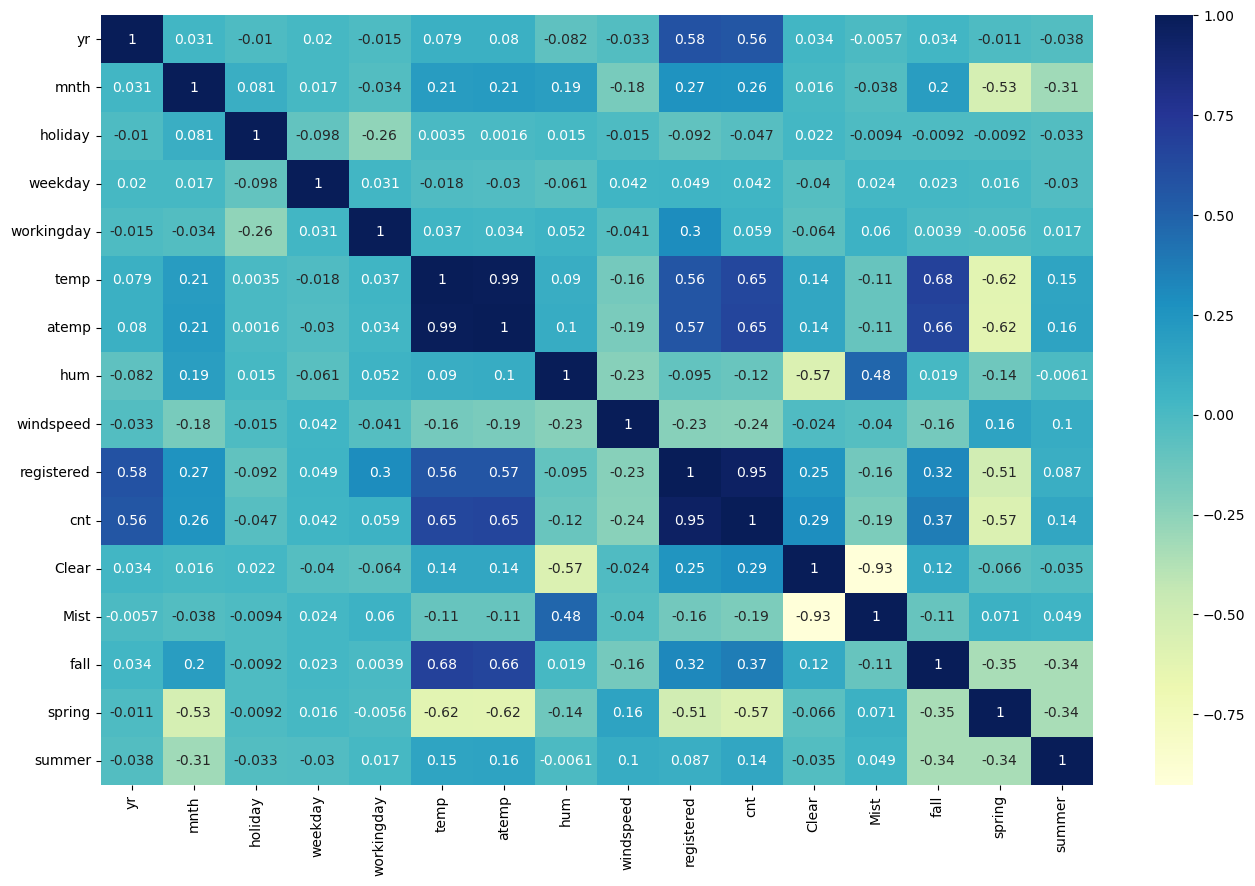

In [418]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(),annot=True,cmap ='YlGnBu')
plt.show()

In [419]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

In [420]:
y_train = train_df.pop('cnt')
X_train = train_df

In [421]:
y_train.head()

692    0.259434
127    0.495973
133    0.389669
524    0.860101
209    0.439945
Name: cnt, dtype: float64

In [422]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,registered,Clear,Mist,fall,spring,summer
692,1,0.909091,0,1.000000,0,0.273137,0.233759,0.416024,0.730778,0.249062,True,False,False,False,False
127,0,0.363636,0,0.000000,0,0.584649,0.606003,0.649529,0.107707,0.420445,True,False,False,False,True
133,0,0.363636,0,1.000000,0,0.575304,0.580786,0.948586,0.232045,0.359082,False,True,False,False,True
524,1,0.454545,0,1.000000,0,0.812053,0.784325,0.449443,0.251294,0.688709,True,False,False,False,True
209,0,0.545455,0,0.833333,1,0.970925,0.973898,0.557841,0.312833,0.455674,True,False,True,False,False


In [423]:
X = X_train
X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float))
lnr_mdl = lnr_mdl.fit()

In [424]:
lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1003.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:39   Log-Likelihood:                 909.77
No. Observations:                 510   AIC:                            -1788.
Df Residuals:                     494   BIC:                            -1720.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.022      3.567      0.000       0.036       0.124
yr             0.0039      0.006      0.651      0.515      -0.008       0.016
mnth          -0.0115      0.010     -1.164      0.245      -0.031       0.008
holiday       -0.0241      0.011     -2.252      0.025      -0.045      -0.003
weekday        0.0039      0.006      0.692      0.489      -0.007       0.015
workingday    -0.1078      0.005    -21.909      0.000      -0.117      -0.098
temp           0.1211      0.061      1.978      0.048       0.001       0.241
atemp         -0.0074      0.060     -0.122      0.903      -0.126       0.111
hum           -0.0426      0.017     -2.502      0.013      -0.076      -0.009
windspeed     -0.0395      0.013     -3.071      0.002      -0.065      -0.014
registered     0.9137      0.020     46.685      0.000       0.875       0.952
Clear          0.0086      0.013      0.672      0.502      -0.017       0.034
Mist           0.0036      0.012      0.308      0.758      -0.019       0.027
fall           0.0052      0.008      0.626      0.532      -0.011       0.021
spring        -0.0081      0.009     -0.857      0.392      -0.027       0.010
summer         0.0209      0.008      2.581      0.010       0.005       0.037
==============================================================================
Omnibus:                       88.543   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.293
Skew:                           0.936   Prob(JB):                     7.86e-42
Kurtosis:                       5.324   Cond. No.                         97.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now perform VIF to check columns significance

# we remove High p-value and low VIF cases first becuse VIF may change after removing high p-value variables.

In [425]:
# now perform VIF to check columns significance
X.shape[1]

15

In [426]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)

In [427]:
vif

,Features,VIF
5,temp,383.61
6,atemp,368.57
9,registered,36.65
7,hum,20.17
10,Clear,18.69
11,Mist,9.24
1,mnth,9.17
13,spring,5.92
8,windspeed,5.65
0,yr,5.44


In [428]:
# yr,weekday,atemp,Clear,Mist

In [429]:
X = X.drop(['atemp'],axis=1)

In [430]:
X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1076.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:                 909.77
No. Observations:                 510   AIC:                            -1790.
Df Residuals:                     495   BIC:                            -1726.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0798      0.022      3.568      0.000       0.036       0.124
yr             0.0040      0.006      0.657      0.511      -0.008       0.016
mnth          -0.0115      0.010     -1.164      0.245      -0.031       0.008
holiday       -0.0240      0.011     -2.251      0.025      -0.045      -0.003
weekday        0.0039      0.006      0.703      0.482      -0.007       0.015
workingday    -0.1078      0.005    -21.965      0.000      -0.117      -0.098
temp           0.1139      0.017      6.866      0.000       0.081       0.146
hum           -0.0428      0.017     -2.515      0.012      -0.076      -0.009
windspeed     -0.0392      0.013     -3.098      0.002      -0.064      -0.014
registered     0.9136      0.020     46.789      0.000       0.875       0.952
Clear          0.0086      0.013      0.669      0.504      -0.017       0.034
Mist           0.0036      0.012      0.306      0.760      -0.019       0.027
fall           0.0053      0.008      0.652      0.515      -0.011       0.021
spring        -0.0081      0.009     -0.856      0.392      -0.027       0.010
summer         0.0210      0.008      2.588      0.010       0.005       0.037
==============================================================================
Omnibus:                       88.422   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.830
Skew:                           0.936   Prob(JB):                     9.91e-42
Kurtosis:                       5.320   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [431]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,registered,36.54
5,temp,27.97
6,hum,19.90
9,Clear,18.57
10,Mist,9.21
1,mnth,9.17
12,spring,5.92
7,windspeed,5.49
0,yr,5.43
11,fall,5.04


In [432]:
X = X.drop(['Clear'],axis=1)
X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1161.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:43   Log-Likelihood:                 909.54
No. Observations:                 510   AIC:                            -1791.
Df Residuals:                     496   BIC:                            -1732.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0894      0.017      5.245      0.000       0.056       0.123
yr             0.0028      0.006      0.480      0.631      -0.009       0.014
mnth          -0.0113      0.010     -1.146      0.252      -0.031       0.008
holiday       -0.0237      0.011     -2.222      0.027      -0.045      -0.003
weekday        0.0035      0.006      0.628      0.530      -0.007       0.014
workingday    -0.1085      0.005    -22.771      0.000      -0.118      -0.099
temp           0.1131      0.017      6.839      0.000       0.081       0.146
hum           -0.0470      0.016     -2.987      0.003      -0.078      -0.016
windspeed     -0.0407      0.012     -3.270      0.001      -0.065      -0.016
registered     0.9187      0.018     51.111      0.000       0.883       0.954
Mist          -0.0036      0.005     -0.780      0.436      -0.013       0.005
fall           0.0056      0.008      0.686      0.493      -0.010       0.022
spring        -0.0069      0.009     -0.742      0.458      -0.025       0.011
summer         0.0214      0.008      2.651      0.008       0.006       0.037
==============================================================================
Omnibus:                       87.937   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.957
Skew:                           0.931   Prob(JB):                     1.53e-41
Kurtosis:                       5.320   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,temp,27.96
8,registered,25.87
6,hum,19.61
1,mnth,8.17
7,windspeed,5.33
10,fall,4.92
0,yr,4.69
4,workingday,4.52
12,summer,4.13
11,spring,3.76


In [434]:
X = X.drop('Mist',axis=1)
X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1258.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:44   Log-Likelihood:                 909.22
No. Observations:                 510   AIC:                            -1792.
Df Residuals:                     497   BIC:                            -1737.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0917      0.017      5.459      0.000       0.059       0.125
yr             0.0023      0.006      0.405      0.686      -0.009       0.014
mnth          -0.0111      0.010     -1.132      0.258      -0.030       0.008
holiday       -0.0237      0.011     -2.228      0.026      -0.045      -0.003
weekday        0.0032      0.006      0.579      0.563      -0.008       0.014
workingday    -0.1088      0.005    -22.909      0.000      -0.118      -0.099
temp           0.1138      0.016      6.900      0.000       0.081       0.146
hum           -0.0527      0.014     -3.779      0.000      -0.080      -0.025
windspeed     -0.0409      0.012     -3.286      0.001      -0.065      -0.016
registered     0.9197      0.018     51.340      0.000       0.885       0.955
fall           0.0054      0.008      0.664      0.507      -0.011       0.021
spring        -0.0070      0.009     -0.759      0.448      -0.025       0.011
summer         0.0210      0.008      2.607      0.009       0.005       0.037
==============================================================================
Omnibus:                       87.372   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.230
Skew:                           0.930   Prob(JB):                     9.88e-41
Kurtosis:                       5.282   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [435]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,temp,27.82
8,registered,25.19
6,hum,15.40
1,mnth,8.07
7,windspeed,5.31
9,fall,4.92
0,yr,4.60
4,workingday,4.48
11,summer,4.13
10,spring,3.70


In [436]:
X = X.drop('mnth',axis=1)
X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:45   Log-Likelihood:                 908.57
No. Observations:                 510   AIC:                            -1793.
Df Residuals:                     498   BIC:                            -1742.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0830      0.015      5.562      0.000       0.054       0.112
yr             0.0021      0.006      0.369      0.712      -0.009       0.013
holiday       -0.0245      0.011     -2.307      0.021      -0.045      -0.004
weekday        0.0029      0.006      0.526      0.599      -0.008       0.014
workingday    -0.1088      0.005    -22.892      0.000      -0.118      -0.099
temp           0.1131      0.016      6.858      0.000       0.081       0.145
hum           -0.0541      0.014     -3.890      0.000      -0.081      -0.027
windspeed     -0.0407      0.012     -3.268      0.001      -0.065      -0.016
registered     0.9203      0.018     51.384      0.000       0.885       0.956
fall           0.0087      0.008      1.140      0.255      -0.006       0.024
spring         0.0003      0.007      0.049      0.961      -0.013       0.013
summer         0.0272      0.006      4.586      0.000       0.016       0.039
==============================================================================
Omnibus:                       87.503   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.838
Skew:                           0.931   Prob(JB):                     7.29e-41
Kurtosis:                       5.287   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,temp,27.62
7,registered,24.09
5,hum,10.91
6,windspeed,4.98
0,yr,4.55
3,workingday,4.46
8,fall,4.44
2,weekday,3.28
10,summer,2.61
9,spring,2.39


In [438]:
X = X.drop(['spring'],axis=1)

X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1512.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:46   Log-Likelihood:                 908.57
No. Observations:                 510   AIC:                            -1795.
Df Residuals:                     499   BIC:                            -1749.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0833      0.013      6.629      0.000       0.059       0.108
yr             0.0022      0.005      0.422      0.673      -0.008       0.013
holiday       -0.0245      0.011     -2.312      0.021      -0.045      -0.004
weekday        0.0029      0.005      0.528      0.598      -0.008       0.014
workingday    -0.1087      0.005    -23.883      0.000      -0.118      -0.100
temp           0.1131      0.016      6.866      0.000       0.081       0.145
hum           -0.0543      0.013     -4.055      0.000      -0.081      -0.028
windspeed     -0.0407      0.012     -3.277      0.001      -0.065      -0.016
registered     0.9199      0.016     59.237      0.000       0.889       0.950
fall           0.0086      0.007      1.154      0.249      -0.006       0.023
summer         0.0271      0.005      4.943      0.000       0.016       0.038
==============================================================================
Omnibus:                       87.365   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.341
Skew:                           0.930   Prob(JB):                     9.35e-41
Kurtosis:                       5.284   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,temp,27.59
7,registered,21.48
5,hum,10.26
6,windspeed,4.50
8,fall,4.22
3,workingday,4.16
0,yr,4.13
2,weekday,3.20
9,summer,2.26
1,holiday,1.12


In [440]:
X = X.drop(['weekday'],axis=1)

X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1682.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:48   Log-Likelihood:                 908.42
No. Observations:                 510   AIC:                            -1797.
Df Residuals:                     500   BIC:                            -1755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0849      0.012      6.942      0.000       0.061       0.109
yr             0.0021      0.005      0.400      0.689      -0.008       0.012
holiday       -0.0250      0.011     -2.369      0.018      -0.046      -0.004
workingday    -0.1088      0.005    -23.921      0.000      -0.118      -0.100
temp           0.1125      0.016      6.851      0.000       0.080       0.145
hum           -0.0544      0.013     -4.071      0.000      -0.081      -0.028
windspeed     -0.0404      0.012     -3.256      0.001      -0.065      -0.016
registered     0.9205      0.015     59.497      0.000       0.890       0.951
fall           0.0088      0.007      1.180      0.239      -0.006       0.023
summer         0.0270      0.005      4.944      0.000       0.016       0.038
==============================================================================
Omnibus:                       89.182   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.474
Skew:                           0.943   Prob(JB):                     4.36e-42
Kurtosis:                       5.325   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [441]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,27.53
6,registered,20.99
4,hum,9.71
5,windspeed,4.26
7,fall,4.22
2,workingday,4.16
0,yr,4.12
8,summer,2.26
1,holiday,1.11


In [442]:
X = X.drop(['yr'],axis=1)

X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1896.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:49   Log-Likelihood:                 908.34
No. Observations:                 510   AIC:                            -1799.
Df Residuals:                     501   BIC:                            -1761.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.012      6.938      0.000       0.061       0.108
holiday       -0.0250      0.011     -2.368      0.018      -0.046      -0.004
workingday    -0.1094      0.004    -25.634      0.000      -0.118      -0.101
temp           0.1103      0.015      7.140      0.000       0.080       0.141
hum           -0.0537      0.013     -4.057      0.000      -0.080      -0.028
windspeed     -0.0395      0.012     -3.239      0.001      -0.063      -0.016
registered     0.9249      0.011     85.159      0.000       0.904       0.946
fall           0.0089      0.007      1.205      0.229      -0.006       0.023
summer         0.0270      0.005      4.937      0.000       0.016       0.038
==============================================================================
Omnibus:                       90.866   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.950
Skew:                           0.958   Prob(JB):                     4.65e-43
Kurtosis:                       5.346   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,24.20
5,registered,10.03
3,hum,9.60
6,fall,4.20
4,windspeed,4.14
1,workingday,3.66
7,summer,2.26
0,holiday,1.11


In [444]:
X = X.drop(['fall'],axis=1)

X_train_sm = sm.add_constant(X)
lnr_mdl = sm.OLS(y_train,X_train_sm.astype(float)).fit()

lnr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2164.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:03:56   Log-Likelihood:                 907.60
No. Observations:                 510   AIC:                            -1799.
Df Residuals:                     502   BIC:                            -1765.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0830      0.012      6.847      0.000       0.059       0.107
holiday       -0.0257      0.011     -2.443      0.015      -0.046      -0.005
workingday    -0.1093      0.004    -25.602      0.000      -0.118      -0.101
temp           0.1244      0.010     12.371      0.000       0.105       0.144
hum           -0.0558      0.013     -4.250      0.000      -0.082      -0.030
windspeed     -0.0403      0.012     -3.311      0.001      -0.064      -0.016
registered     0.9227      0.011     86.241      0.000       0.902       0.944
summer         0.0229      0.004      5.342      0.000       0.014       0.031
==============================================================================
Omnibus:                       88.828   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.066
Skew:                           0.943   Prob(JB):                     1.45e-41
Kurtosis:                       5.301   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float),i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,10.36
5,registered,9.51
3,hum,8.58
4,windspeed,4.05
1,workingday,3.66
6,summer,1.39
0,holiday,1.11


In [446]:
y_train_pred = lnr_mdl.predict(X_train_sm)

In [447]:
r2_score (y_true = y_train, y_pred=y_train_pred)

0.9679288982285977

In [451]:
X_train_sm.head()

,const,holiday,workingday,temp,hum,windspeed,registered,summer
692,1.0,0,0,0.273137,0.416024,0.730778,0.249062,False
127,1.0,0,0,0.584649,0.649529,0.107707,0.420445,True
133,1.0,0,0,0.575304,0.948586,0.232045,0.359082,True
524,1.0,0,0,0.812053,0.449443,0.251294,0.688709,True
209,1.0,0,1,0.970925,0.557841,0.312833,0.455674,False


# Step 4: Residual Analysis

In [448]:
y_train_pred = lnr_mdl.predict(X_train_sm)

<Axes: ylabel='Density'>

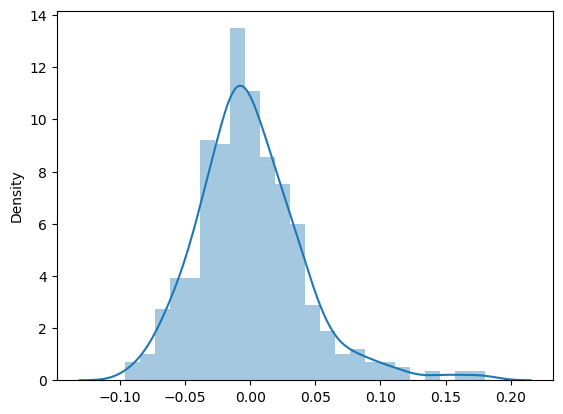

In [449]:
res = y_train - y_train_pred
sns.distplot(res)

In [341]:
# num_var= ['atemp',temp','hum','windspeed','cnt','registered','mnth','weekday']

In [342]:
# fit - Train
# transform - Train/ Test
# fit_transform - Train

In [450]:
test_df[num_var] = scaler.transform(test_df[num_var])
test_df.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,365.786364,0.504545,0.501653,0.018182,0.475758,0.718182,0.555893,0.559001,0.655745,0.352546,853.436364,0.544047,0.531467
std,202.087134,0.501120,0.305733,0.133913,0.330149,0.450911,0.226057,0.225717,0.142493,0.156975,681.217042,0.213347,0.209294
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.027237,0.323051,0.047441,15.000000,0.057176,0.047055
25%,202.750000,0.000000,0.272727,0.000000,0.166667,0.000000,0.370745,0.388126,0.539585,0.250034,336.750000,0.388247,0.387627
50%,367.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.571151,0.590783,0.673950,0.330123,717.000000,0.540283,0.532329
75%,526.500000,1.000000,0.818182,0.000000,0.833333,1.000000,0.746377,0.731490,0.768745,0.435254,1046.250000,0.701956,0.705821
max,730.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.983385,1.049574,0.989717,0.824380,3410.000000,0.994947,0.951680


In [452]:
y_test = test_df.pop('cnt')
X_test = test_df[['holiday','workingday','temp','hum','windspeed','registered','summer']]#,'hum','temp'

In [453]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,hum,windspeed,registered,summer
625,1.0,0,1,0.703024,0.897172,0.691023,0.531620,False
572,1.0,0,1,0.900316,0.611396,0.269239,0.812157,False
201,1.0,0,1,0.941851,0.710797,0.411546,0.452209,False
148,1.0,0,0,0.758058,0.841902,0.394883,0.348397,True
512,1.0,1,0,0.814131,0.695373,0.358977,0.500433,True


In [342]:
#X_test_sm= X_test_sm.drop(['atemp','Clear','Mist','mnth','spring','yr','fall','weekday'],axis=1)

In [343]:
#X_test_sm2 = X_test_sm[['const','registered','workingday','summer','windspeed','temp','hum','holiday']] # ,'temp','hum','holiday'

In [454]:
y_test_pred = lnr_mdl.predict(X_test_sm)

In [455]:
r2_score (y_true = y_test, y_pred=y_test_pred)

0.9597433621440212